In [1]:
# Import Libraries
import matplotlib.pyplot as plt
import networkx as nx
import itertools
import numpy as np
import scipy as sp
from numpy.linalg import pinv
from numpy.random import randint, normal
from networkx.algorithms.clique import find_cliques, enumerate_all_cliques, make_max_clique_graph, graph_number_of_cliques
from networkx.algorithms.matching import maximal_matching
from networkx.algorithms.operators.unary import complement
from networkx.generators.random_graphs import erdos_renyi_graph #CHANGE THIS IMPORT TO INCLUDE OTHER GRAPH TYPES
from networkx.linalg.algebraicconnectivity import algebraic_connectivity
from scipy import stats
import itertools as it
from collections import Counter

In [2]:
import os
import sys
sys.path.insert(0, os.path.abspath('../modules'))
import block_RK as ac

In [3]:
# Adjust plot size
plt.rcParams["figure.figsize"] = (8, 8)

# ER Experiments

### experimental set-up

In [4]:
# Initialize Graph
n = 420
p = 0.6
G = erdos_renyi_graph(n, p)
m = len(G.edges())

In [5]:
# Initialize Incidence Matrix
A = nx.linalg.graphmatrix.incidence_matrix(G)
A = sp.sparse.csr_matrix.todense(A).transpose()
# their incidence matrix is binary, we need to convert one of the ones to a -1
for i in range(np.shape(A)[0]):
    negindex = np.where(A[i,:] == 1)
    A[i,negindex[1][0]] = -1

In [6]:
# Fix x, b
# Secret initial vector x
x = np.random.rand(n,1)
# Zero Vector b
b = np.zeros((m,1))
# Find mean of x
xbar = np.mean(x)
# Create solution vector (vector with just xbar as values)
sol = np.full((n,1), xbar)

### Path gossip

In [8]:
# Path Gossip with l = 100
N = 200
l = 100
paths, testx, x_list, errs = ac.blockRK_path(A, G, sol, b, N, x, l)

IntProgress(value=0, max=501)

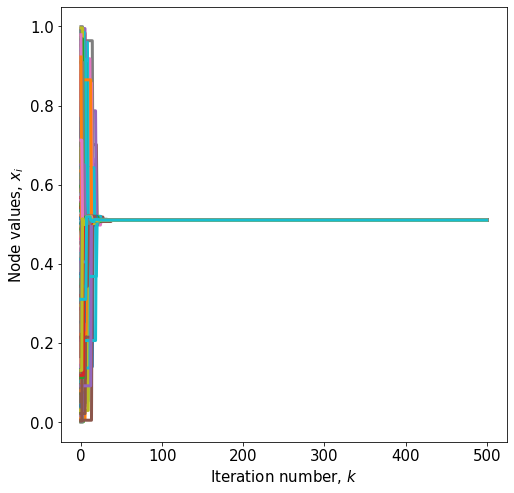

<Figure size 576x576 with 0 Axes>

In [9]:
ac.collapse_plt(x_list, n, N)
plt.show()
plt.savefig("plots/ER_p06_path_collapse.svg", format='svg')

In [10]:
ac.error_plt(errs, G, paths, sol, N, rate='path')
plt.show()
plt.savefig("plots/ER_p06_path_error.svg", format='svg')

rate calculated!
bound calculated!


KeyboardInterrupt: 

### IES gossip

In [ ]:
N = 200
ies = ac.blocks_from_ies(G, A)
test_x, xlist, errs = ac.blockRK(A, sol, b, ies, N, x)

In [ ]:
ac.collapse_plt(xlist, n, N)
plt.show()
plt.savefig("plots/ER_p06_ies_collapse.svg", format='svg')

In [ ]:
ac.error_plt(errs, G, ies, sol, N, rate='ies')
plt.show()
plt.savefig("plots/ER_p06_ies_error.svg", format='svg')

### clique gossip

In [ ]:
# upper bound
bound = 50
N = 500
cliques = ac.clique_edge_cover(G, A, bound)
test_x, xlist, errs = ac.blockRK(A, sol, b, cliques, N, x)

In [ ]:
ac.collapse_plt(xlist, n, N)
plt.show()
plt.savefig("plots/ER_p06_clique_collapse.svg", format='svg')

In [ ]:
ac.error_plt(errs, G, cliques, sol, N, rate='cliques')
plt.show()
plt.savefig("plots/ER_p06_clique_error.svg", format='svg')

### random

In [ ]:
N = 200
s = 25
bn = 3s00
blocks = ac.random_blocks(A, s, bn) # parameters are: incidence matrix, size of blocks, number of blocks
test4, list4, err4 = ac.blockRK(A, sol, b, blocks, N, x)

In [ ]:
ac.collapse_plt(list4, n, N)
plt.show()
plt.savefig("plots/ER_p06_arbi_collapse.svg", format='svg')

In [ ]:
bound, r, sq = ac.error_plt(err4, G, blocks, sol, N, rate='arbi')
plt.show()
plt.savefig("plots/ER_p06_arbi_error.svg", format='svg')